In [36]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import pandas as pd

In [14]:
ticker = "TATAMOTORS.BO"
data = yf.download(ticker, start='2020-06-27', end='2024-06-27')

[*********************100%%**********************]  1 of 1 completed


In [15]:
data = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)
data

,Close
Date,
2020-06-29,99.500000
2020-06-30,98.250000
2020-07-01,100.699997
2020-07-02,101.550003
2020-07-06,109.000000
...,...
2024-06-20,978.099976
2024-06-21,961.049988
2024-06-24,958.250000


In [16]:
def calculate_sma(data, window):
    return data['Close'].rolling(window=window).mean()

data['SMA_20'] = calculate_sma(data, 20)  
data['SMA_50'] = calculate_sma(data, 50)  

In [17]:
def calculate_ema(data, window):
    return data['Close'].rolling(window=window).mean()

data['EMA_20'] = calculate_ema(data, 20)  
data['EMA_50'] = calculate_ema(data, 50)  

In [18]:
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI_14'] = calculate_rsi(data, 14)  

In [19]:
data

,Close,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14
Date,,,,,,
2020-06-29,99.500000,NaN,NaN,NaN,NaN,NaN
2020-06-30,98.250000,NaN,NaN,NaN,NaN,NaN
2020-07-01,100.699997,NaN,NaN,NaN,NaN,NaN
2020-07-02,101.550003,NaN,NaN,NaN,NaN,NaN
2020-07-06,109.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-06-20,978.099976,959.132504,978.307001,959.132504,978.307001,64.428982
2024-06-21,961.049988,959.082504,977.387001,959.082504,977.387001,59.422800
2024-06-24,958.250000,958.957504,976.293000,958.957504,976.293000,52.178804


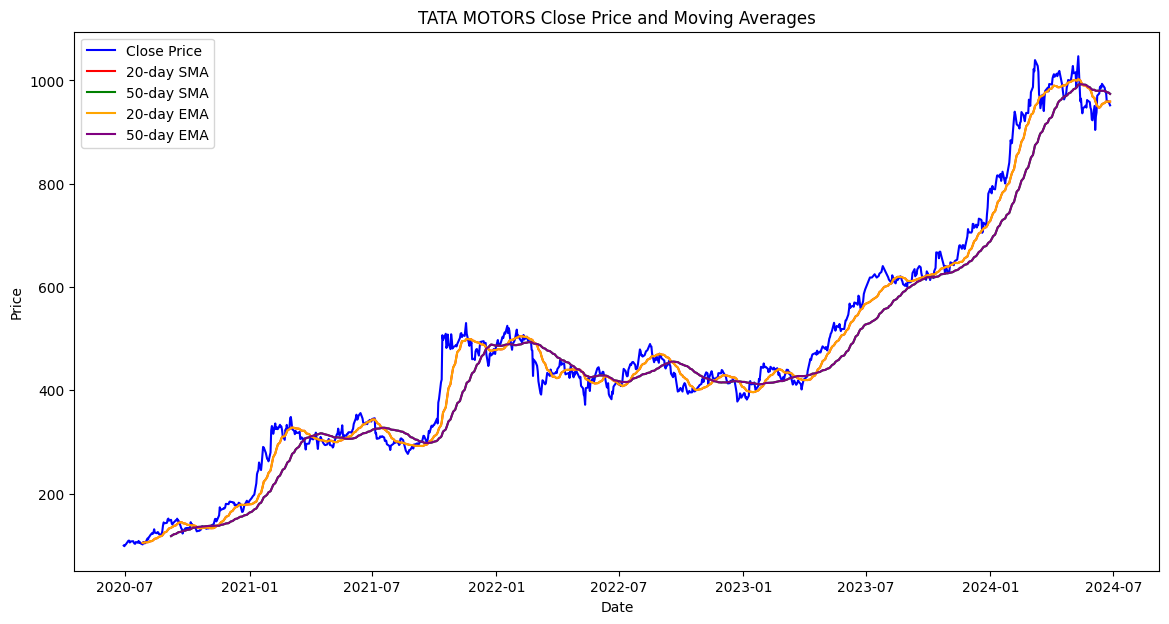

In [20]:
#plotting the sma and ema
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='20-day SMA', color='red')
plt.plot(data['SMA_50'], label='50-day SMA', color='green')
plt.plot(data['EMA_20'], label='20-day EMA', color='orange')
plt.plot(data['EMA_50'], label='50-day EMA', color='purple')
plt.title('TATA MOTORS Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

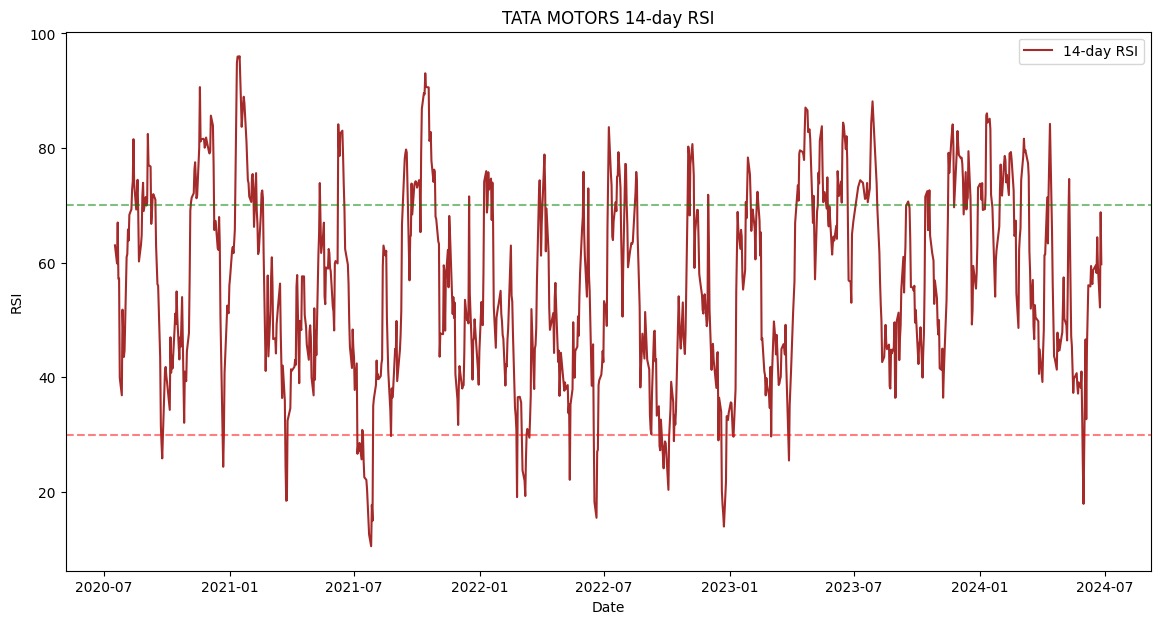

In [29]:
#ploting the rsi values
plt.figure(figsize=(14, 7))
plt.plot(data['RSI_14'], label='14-day RSI', color='brown')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='green')
plt.title('TATA MOTORS 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

In [21]:
data

,Close,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14
Date,,,,,,
2020-06-29,99.500000,NaN,NaN,NaN,NaN,NaN
2020-06-30,98.250000,NaN,NaN,NaN,NaN,NaN
2020-07-01,100.699997,NaN,NaN,NaN,NaN,NaN
2020-07-02,101.550003,NaN,NaN,NaN,NaN,NaN
2020-07-06,109.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-06-20,978.099976,959.132504,978.307001,959.132504,978.307001,64.428982
2024-06-21,961.049988,959.082504,977.387001,959.082504,977.387001,59.422800
2024-06-24,958.250000,958.957504,976.293000,958.957504,976.293000,52.178804


In [47]:

data = data.dropna()

#Check
print(data.isna().sum())

Close     0
SMA_20    0
SMA_50    0
EMA_20    0
EMA_50    0
RSI_14    0
dtype: int64


In [54]:
data

,Close,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14
Date,,,,,,
2020-09-07,149.350006,133.977501,117.876001,133.977501,117.876001,76.775639
2020-09-08,142.250000,134.975001,118.731001,134.975001,118.731001,66.764692
2020-09-09,140.250000,135.722501,119.571001,135.722501,119.571001,68.718457
2020-09-10,143.250000,136.330000,120.422001,136.330000,120.422001,71.525086
2020-09-11,144.300003,137.317500,121.277001,137.317500,121.277001,71.958165
...,...,...,...,...,...,...
2024-06-20,978.099976,959.132504,978.307001,959.132504,978.307001,64.428982
2024-06-21,961.049988,959.082504,977.387001,959.082504,977.387001,59.422800
2024-06-24,958.250000,958.957504,976.293000,958.957504,976.293000,52.178804


In [23]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'RSI_14', 'SMA_20', 'EMA_20', 'SMA_50', 'EMA_50']])

# Convert scaled data back to DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=['Close', 'RSI_14', 'SMA_20', 'EMA_20', 'SMA_50', 'EMA_50'])

In [56]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Close price predictor
    return np.array(X), np.array(y)

seq_length = 60  # length is adjustable
X, y = create_sequences(scaled_data, seq_length)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #making training and testing sets

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [59]:
# Building the LSTM model
model = Sequential()

# Adding an Input layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Adding the LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Adding another LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding a Dense layer with one unit (predicting the 'Close' price)
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0273 - val_loss: 0.0412
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0048 - val_loss: 0.0394
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0032 - val_loss: 0.0276
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0026 - val_loss: 0.0252
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0021 - val_loss: 0.0123
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0021 - val_loss: 0.0096
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0017 - val_loss: 0.0069
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0

In [61]:
# Evaluating the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026
Test Loss: 0.003371978411450982


In [62]:
# Making predictions
predicted_prices = model.predict(X_test)

# Inverse transform to get the actual price predictions
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], scaled_data.shape[1] - 1))], axis=1))[:, 0]

# Get the actual prices
actual_prices = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))], axis=1))[:, 0]


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


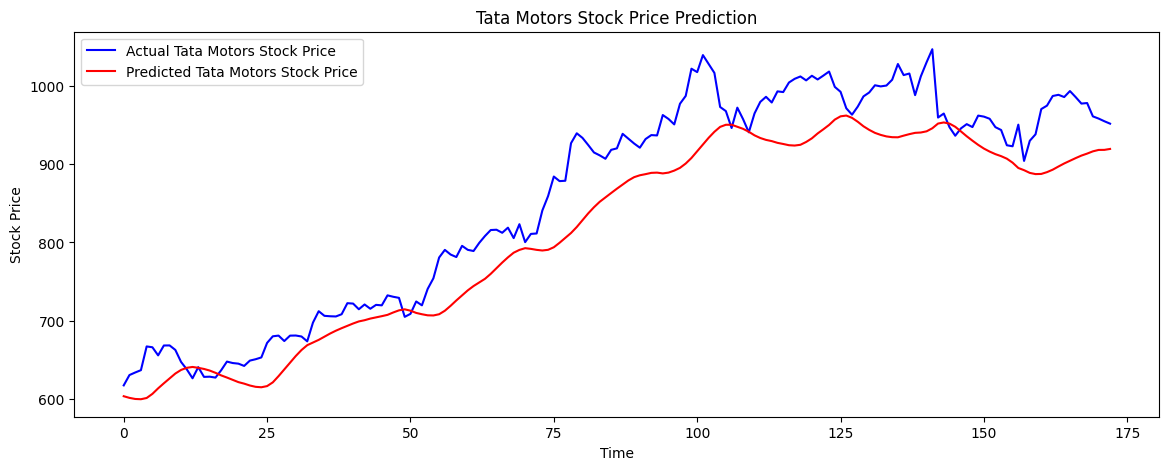

In [63]:
# Visualizing the results
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, color='blue', label='Actual Tata Motors Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Tata Motors Stock Price')
plt.title('Tata Motors Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
